# <font color= 'blue'> Machine Learning
# <font color='blue'> Project 1 </font>

## <font color= 'blue'> Decision Tree Classification
Mehek Niwas || MTH 4224 Spring 2024

# <font color= 'blue'> Goals

*1) Use machine learning models to classify entries into 1 of 2 income classes: <=50k or >50k annual income*

*2) Compare the performance of multiple machine learning model types -- Decision Tree Classifer, Random Forest Classifer, & Gradient Boosted Trees Classifer*


# <font color= 'blue'> United States Census Income Dataset
This dataset was obtained from the UCI Machine Learning Respository, provided by Kohavi. It was created by extraction from the 1994 US Census database.

Link: https://archive.ics.uci.edu/dataset/20/census+income

#### **Input: Features**
Train Shape: 32,561 x 14 (50%)

Val/Test Shape: 16,281 x 14 (25%, 25%)

Contains some missing values as "?". There are binary, categorical, and numerical features. Each feature-vector represents one person.
The categorical variables will be one-hot encoded for the decision tree classifer. For the neural decision tree classifer, embedding will be used to encode the categorical variables.

#### **Output: Income**
Train Shape: 32,561 x 1 (50%)

Val/Test Shape: 16,281 x 1 (25%, 25%)

Yearly income is labeled as <=50K (less than/equal to 50k income), and >50K (more than 50k income). To convert into binary, <=50k was represented as 0, and >50k was represented as 1.

# <font color= 'blue'> Data Preprocressing & Preparation
*If section title colored purple, need to re-run for every new runtime session*

***Modifications:*** Some parts of dataset were pre-procressed, but heavy inspection of variables was necessary to make sure data was not redundant or in conflict with target. Missing values were removed, categorical variables were encoded (one-hot). The binary features were converted into integer values instead of boolean (t/f). As implied earlier, some feature types were removed due to redundancy. Table below shows removals and other feature-specific information.

***Randomization & Reproducibility***: Used original train test splits from provided csv files, then used ```train_test_split``` from sci-kit learn to split again into train, valid, and test datasets. Wrote functions to print confusion matrix and classification reports.



### <font color= 'black'> **Dataset Variables & Changes**
Categorical Features are bolded. Removed features are italicized.
In embedding, did not drop any specific categories within the features, but dropped features remained dropped.

<font color= 'black'>

column | type | description/categories | status | num_categories
-------|------|------------------------|--------|--------------
age | int | self describing | int | n/a
**workclass** | **string** | **the type of the employer the individual has ex: gov/private/etc** | **encoded** | **7**
<font color= 'red'> *fnlwgt* | *int* | *the final sampling weight* | <font color= 'red'> *removed* | *n/a*
<font color= 'red'> *education* | *string* | *the highest education attained* | <font color= 'red'> *removed* | *n/a*
education-num | int | a numerical representation of the highest education attained | int | n/a
**marital-status** | **string** | **marital status ex: married/single/etc** | **encoded** | **7**
**occupation** | **string** | **generic field of work ex: execu-managerial/prof-speciality/etc** | **encoded** | **14**
<font color= 'red'> *relationship* | *string* | 	*contains family relationship values like husband and father* | <font color= 'red'> *removed* | *6*
**race** | **string** | **self describing**  | **encoded** | **5**
sex | string | self describing | binary | n/a
capitial-gain | int | income received other than salary | int | n/a
capitial-loss | int | income lost other than salary | int | n/a
hours_per_week | int | hours worked per week | int | n/a
<font color= 'red'> *native-country* | *string* | *country of origin of the individual* |<font color= 'red'> *removed*  | *41*
income | string | 	(less or equal) <=50K / (more) >50K | binary | n/a

## <font color= 'purple'>  Imports

In [ ]:
!pip install matplotlib

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

import keras
print("Keras: ", keras.__version__)
from keras import layers
from keras.layers import StringLookup
import urllib
import tensorflow as tf
print("Tensorflow: ", tf.__version__)
from tensorflow import data as tf_data
from tensorflow import keras
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

Keras:  2.15.0
Tensorflow:  2.15.0


## <font color= 'purple'>  Data Preparation Code
**Notes/Issues:**
- dropping education, fnlgwt, modifying income dot, removing first row of test set ==== due to data redundancy issue
- removing native country because too many categories + not directly relevant anyway
- problem w/ converting sex to binary values

^^Solved: original data has all categorical variables with a space in front of the string. ex: " Male" instead of "Male"
<< headers do not have this same issue



In [ ]:
# original data
 # does not have csv_header. get headers from variables table on dataset page

# fetch dataset
census_income = fetch_ucirepo(id=20)

# metadata information ---> census_income.metadata
# variable information --> census_income.variables
print("Dataset Variables: ")

# code for printing aesthetics
dataset_variables = pd.DataFrame(census_income.variables) # convert ucimlrepo variables to dataframe
dataset_variables = dataset_variables.rename(columns={'missing_values': 'NaN'}) # renaming to shorter name
selected_columns = ['name', 'role', 'type', 'NaN'] # list of columns to view
print(dataset_variables[selected_columns])

# original data storing
 # does not have csv_header. get headers from variables table on dataset page
train_data_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
test_data_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")

Dataset Variables: 
              name     role         type  NaN
0              age  Feature      Integer   no
1        workclass  Feature  Categorical  yes
2           fnlwgt  Feature      Integer   no
3        education  Feature  Categorical   no
4    education-num  Feature      Integer   no
5   marital-status  Feature  Categorical   no
6       occupation  Feature  Categorical  yes
7     relationship  Feature  Categorical   no
8             race  Feature  Categorical   no
9              sex  Feature       Binary   no
10    capital-gain  Feature      Integer   no
11    capital-loss  Feature      Integer   no
12  hours-per-week  Feature      Integer   no
13  native-country  Feature  Categorical  yes
14          income   Target       Binary   no


In [ ]:
# use provided variables information to add/create the header
CSV_HEADER = census_income.variables.name.tolist()

# panda data frame of dataset w/ header
train_data = pd.read_csv(train_data_url, header=None, names=CSV_HEADER)
test_data = pd.read_csv(test_data_url, header=None, names=CSV_HEADER)

print("Original Train Dataset... Peeking: ")
print(f"Shape: {train_data.shape}"); print()
print(train_data.head()); print()
print(); print()

print("Original Val/Test Dataset... Peeking: ")
print(f"Shape: {test_data.shape}"); print()
print(test_data.head()); print()

Original Train Dataset... Peeking: 
Shape: (32561, 15)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2

## <font color= 'purple'>  Cleaning Dataframe

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

print("Cleaning Testing Dataframe ...")
# exclude first line because it says "|1x3 Cross validator" (only for test data not in train data)
test_data = test_data[1:]
test_data = test_data.drop('fnlwgt', axis=1)
# drop na --> =nan values are "?" in dataframe
value_to_drop = '?'
test_data = test_data[test_data.astype(str).apply(lambda x: x.str.strip() != value_to_drop).all(axis=1)]
# removing education column (repetitive w/ "education-num"). & removing relationship (repetitive w/ martial-status)
test_data = test_data.drop('education', axis=1)
test_data = test_data.drop('relationship', axis=1)
test_data = test_data.drop('native-country', axis=1)
test_data['sex'].replace({" Male": 1, " Female": 0}, inplace = True)
# trailing dot in class labels --> current says "<=50K." instead of "<=50K" (only for test data not in train data)
test_data['income'] = test_data['income'].apply(lambda value: value.replace(".", ""))
# switch numerical categories to integers
test_data = test_data.astype({'age': int, 'education-num': int, 'capital-gain': int, 'capital-loss': int, 'hours-per-week': int})
print(test_data.head()); print()

print("Cleaning Training & Validation Dataframe ...")
train_df = train_data
train_df = train_df.drop('fnlwgt', axis=1)
train_df = train_df.drop('education', axis=1)
train_df = train_df.drop('relationship', axis=1)
train_df = train_df.drop('native-country', axis=1)
train_df['sex'].replace({" Male": 1, " Female": 0}, inplace = True)
train_df = train_df.astype({'age': int, 'education-num': int, 'capital-gain': int, 'capital-loss': int, 'hours-per-week': int})
value_to_drop = '?'
train_df = train_df[train_df.astype(str).apply(lambda x: x.str.strip() != value_to_drop).all(axis=1)]
print(train_df.head()); print()

print("=============================================")

# Randomly split the DataFrame into training and testing sets
valid_df, test_df = train_test_split(test_data, test_size=0.5, random_state=42)

# Display the sizes of the resulting DataFrames
print("Training DataFrame size:", train_df.shape)
print("Validation DataFrame size:", valid_df.shape)
print("Testing DataFrame size:", test_df.shape)

Cleaning Testing Dataframe ...
   age   workclass  education-num       marital-status          occupation  \
1   25     Private              7        Never-married   Machine-op-inspct   
2   38     Private              9   Married-civ-spouse     Farming-fishing   
3   28   Local-gov             12   Married-civ-spouse     Protective-serv   
4   44     Private             10   Married-civ-spouse   Machine-op-inspct   
6   34     Private              6        Never-married       Other-service   

     race  sex  capital-gain  capital-loss  hours-per-week  income  
1   Black    1             0             0              40   <=50K  
2   White    1             0             0              50   <=50K  
3   White    1             0             0              40    >50K  
4   Black    1          7688             0              40    >50K  
6   White    1             0             0              30   <=50K  

Cleaning Training & Validation Dataframe ...
   age          workclass  education-num

We store the training and test data splits locally as CSV files.

In [ ]:
train_data_file = "train_data.csv"
valid_data_file = "valid_data.csv"
test_data_file = "test_data.csv"

train_df.to_csv(train_data_file, index=False, header=False)
valid_df.to_csv(valid_data_file, index=False, header=False)
test_df.to_csv(test_data_file, index=False, header=False)

In [ ]:
# update csv header
# CSV_HEADER = census_income.variables.name.tolist() --> original header
print(CSV_HEADER)
CSV_HEADER.remove('fnlwgt')
CSV_HEADER.remove('education')
CSV_HEADER.remove('relationship')
CSV_HEADER.remove('native-country')
print(CSV_HEADER)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


## <font color= 'purple'>  Encoding: One-hot  
Converting Dataframe to numerical values only

*Notes/Issues:*
- 41 countries --> in training dataset. 81 columns from one-hot
- 39 countries --> in validation dataset. 79 columns from one-hot
- 40 countries --> in testing dataset. 80 columns from one-hot

Issue might be resolved after grouping countries by contient. --> possibly do in a data experiment

^^Temporary solution: removing data with countries that are not represented in all sets
<< only for one-hot encoding

^^Final solution: decided to remove native-country feature entirely

In [ ]:
# switch to 1-hot
train_numerical_df =  train_df
valid_numerical_df = valid_df
test_numerical_df = test_df

# Encoding categorical variables in training dataframe
print("Encoding training dataframe ...")
train_numerical_df = pd.get_dummies(train_numerical_df, columns = ['workclass', 'marital-status', 'occupation', 'race'], dtype=int)
train_numerical_df['income'].replace({" >50K": 1, " <=50K": 0}, inplace = True) # 1 --> more than 50k income; 0 --> less than or real to 50k income

# moving income column to last index
df1 = train_numerical_df.pop('income'); train_numerical_df['income']=df1

# df['MyColumn'].sum()
print("Columns & Totals: ")
columnList1 = train_numerical_df.columns.tolist()
for i in range(len(columnList1)):
  print("", columnList1[i], "Total: ", train_numerical_df[columnList1[i]].sum())
print()
print(train_numerical_df)
print("=============================")
print("")

# Encoding categorical variables in validation dataframe
print("Encoding validation dataframe ...")
valid_numerical_df = pd.get_dummies(valid_numerical_df, columns = ['workclass', 'marital-status', 'occupation', 'race'], dtype=int)
valid_numerical_df['income'].replace({" >50K": 1, " <=50K": 0}, inplace = True)

df1 = valid_numerical_df.pop('income')
valid_numerical_df['income']=df1

# df['MyColumn'].sum()
print("Columns & Totals: ")
columnList2 = valid_numerical_df.columns.tolist()
for i in range(len(columnList2)):
  print("", columnList2[i], "Total: ", valid_numerical_df[columnList2[i]].sum())
print()

print(valid_numerical_df)
print("=============================")
print("")

# Encoding categorical variables in testing dataframe
print("Encoding testing dataframe ...")
test_numerical_df = pd.get_dummies(test_numerical_df, columns = ['workclass', 'marital-status', 'occupation', 'race'], dtype=int)
test_numerical_df['income'].replace({" >50K": 1, " <=50K": 0}, inplace = True)

df1 = test_numerical_df.pop('income')
test_numerical_df['income']=df1

# df['MyColumn'].sum()
print("Columns & Totals: ")
columnList3 = test_numerical_df.columns.tolist()
for i in range(len(columnList3)):
  print("", columnList3[i], "Total: ", test_numerical_df[columnList3[i]].sum())
print()

print(test_numerical_df)
print("=============================")
print("")

# Display the sizes of the resulting DataFrames
print("Convertin data into numerical values... ")
print("Training DataFrame size:", train_numerical_df.shape)
print("Validation DataFrame size:", valid_numerical_df.shape)
print("Testing DataFrame size:", test_numerical_df.shape)

Encoding training dataframe ...
Columns & Totals: 
 age Total:  1180910
 education-num Total:  311183
 sex Total:  20788
 capital-gain Total:  33975247
 capital-loss Total:  2731144
 hours-per-week Total:  1257881
 workclass_ Federal-gov Total:  960
 workclass_ Local-gov Total:  2093
 workclass_ Private Total:  22696
 workclass_ Self-emp-inc Total:  1116
 workclass_ Self-emp-not-inc Total:  2541
 workclass_ State-gov Total:  1298
 workclass_ Without-pay Total:  14
 marital-status_ Divorced Total:  4258
 marital-status_ Married-AF-spouse Total:  21
 marital-status_ Married-civ-spouse Total:  14339
 marital-status_ Married-spouse-absent Total:  389
 marital-status_ Never-married Total:  9912
 marital-status_ Separated Total:  959
 marital-status_ Widowed Total:  840
 occupation_ Adm-clerical Total:  3770
 occupation_ Armed-Forces Total:  9
 occupation_ Craft-repair Total:  4099
 occupation_ Exec-managerial Total:  4066
 occupation_ Farming-fishing Total:  994
 occupation_ Handlers-cleane

In [ ]:
print("finding unique columns")
set1 = set(columnList1)
set2 = set(columnList2)
set3 = set(columnList3)

# Find elements unique to each list
unique_to_columnList1 = set(columnList1) - set(columnList2) - set(columnList3)
unique_to_columnList2 = set(columnList2) - set(columnList1) - set(columnList3)
unique_to_columnList3 = set(columnList3) - set(columnList1) - set(columnList2)

# Find elements that are not present in more than 1 list
unique_to_single_list = unique_to_columnList1.union(unique_to_columnList2, unique_to_columnList3)
unique_to_multiple_lists = set()

# Filter out elements that are unique to only one list
for item in set(columnList1 + columnList2 + columnList3):
  count = 0
  if item not in columnList1:
    count += 1
  if item not in columnList2:
    count += 1
  if item not in columnList3:
    count += 1
  if count > 0:
    unique_to_multiple_lists.add(item)

print("Elements not present in more than 1 list:", unique_to_multiple_lists)
print("result of set() implies no elements")

finding unique columns
Elements not present in more than 1 list: set()
result of set() implies no elements


In [ ]:
train_num_data_file = "train_numerical_data.csv"
valid_num_data_file = "valid_numerical_data.csv"
test_num_data_file = "test_numerical_data.csv"

train_numerical_df.to_csv(train_num_data_file, index=False, header=False)
valid_numerical_df.to_csv(valid_num_data_file, index=False, header=False)
test_numerical_df.to_csv(test_num_data_file, index=False, header=False)

## <font color= 'purple'>   Model Functions
- seperate features from targets
- print classification report with specified labels
- print confusion matrix with specified labels

In [ ]:
def sep_feat_tar(dataframe):
# dataset_csv is a string for the path
# return will be dataset_inputs, dataset_targets
  dataset_inputs = dataframe.drop('income', axis=1) # use inplace=True if change desired in original dataframe as well
  dataset_targets = dataframe['income']

  return dataset_inputs, dataset_targets

print("Getting data...") # create inputs and targets from dataframe
trainX, trainY = sep_feat_tar(train_numerical_df)
validX, validY = sep_feat_tar(valid_numerical_df)
testX, testY = sep_feat_tar(test_numerical_df)
print("Data is ready!")

Getting data...
Data is ready!


In [ ]:
def get_metrics(model, dataX, dataY, u_str):
  # predict labels
  predicted = model.predict(dataX)
  # print quality metrics
  print(u_str, "Classification Report:\n\n", classification_report(dataY, predicted))
  print()

  cm = confusion_matrix(dataY, predicted)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"]) # display labels are set from 0 to n-1
  disp.plot()
  disp.ax_.set_title(u_str + " Dataset Confusion Matrix")

# <font color= 'blue'> Benchmark: Logistic Regression
***Architecture Constants:***
- sklearn defaults

***Performance:*** 77% train macro accuracy, 77% val macro accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

# train
log_model = LogisticRegression()
log_model.get_params()
print("Fitting the model...")
log_model.fit(trainX, trainY)

Fitting the model...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.92      0.89     23068
           1       0.71      0.57      0.64      7650

    accuracy                           0.84     30718
   macro avg       0.79      0.75      0.77     30718
weighted avg       0.83      0.84      0.83     30718




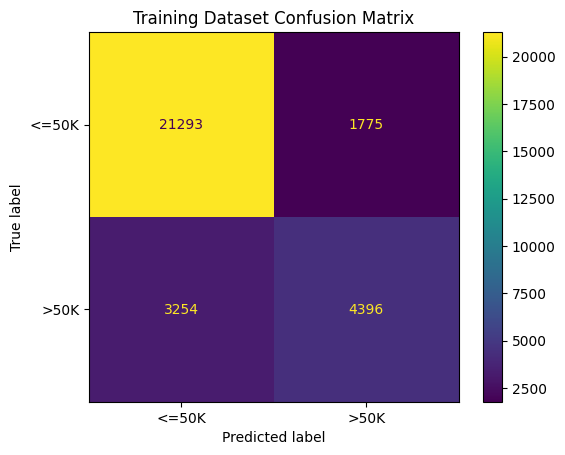

In [ ]:
get_metrics(log_model, trainX, trainY, "Training")

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.93      0.90      5693
           1       0.72      0.57      0.64      1837

    accuracy                           0.84      7530
   macro avg       0.80      0.75      0.77      7530
weighted avg       0.84      0.84      0.84      7530




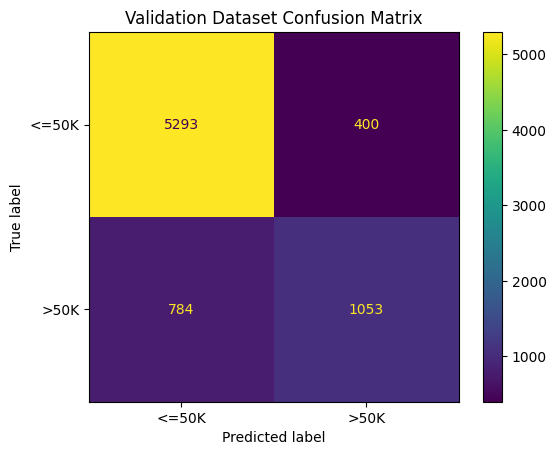

In [ ]:
get_metrics(log_model, validX, validY, "Validation")

# <font color= 'blue'> Experiment 1: Decision Tree - Min_Samples_Split (0.2, 0.3, 0.4, 0.5)
***Architecture Constants:***
- mostly sklearn defaults

***Best Model:*** Inconclusive - using 0.4 for now since it allows for least computational cost and over growing of tree

Most minimum sample splits resulted in same performance. Cap is at 0.4 because once split was increased to 0.5, performance became very low.

## Min_Samples_Split = 0.2
### train macro acc = 70%; val macro acc = 71%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.2, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.05, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


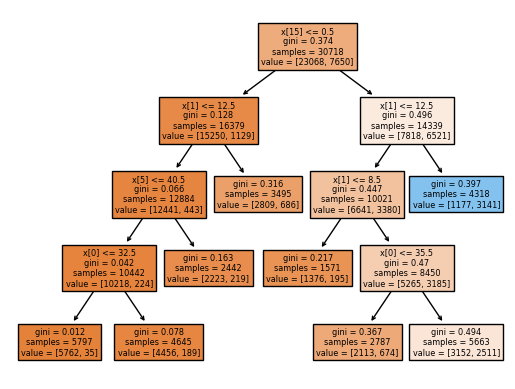

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89     23068
           1       0.73      0.41      0.52      7650

    accuracy                           0.81     30718
   macro avg       0.78      0.68      0.70     30718
weighted avg       0.80      0.81      0.80     30718




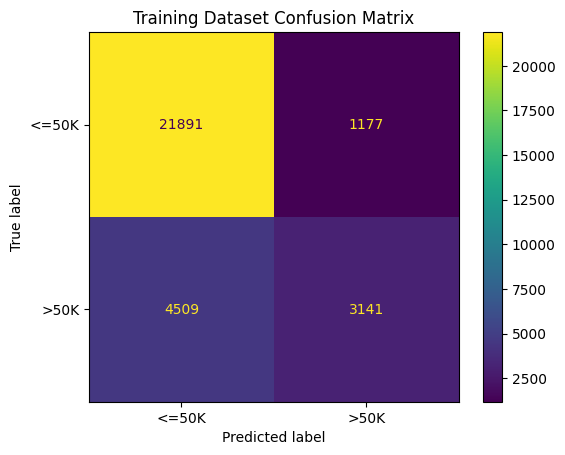

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5693
           1       0.74      0.41      0.53      1837

    accuracy                           0.82      7530
   macro avg       0.79      0.68      0.71      7530
weighted avg       0.81      0.82      0.80      7530




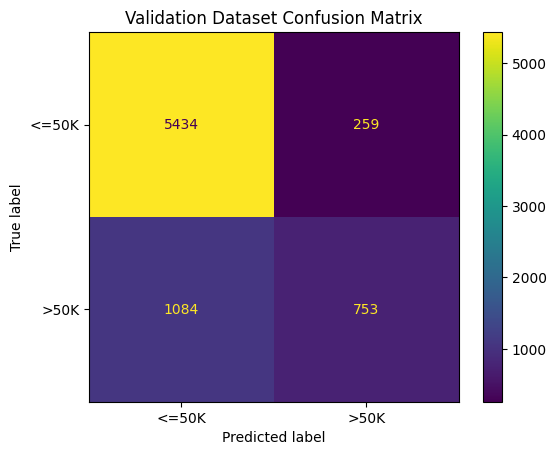

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Split = 0.3
### train macro acc = 70%; val macro acc = 71%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.3, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.05, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


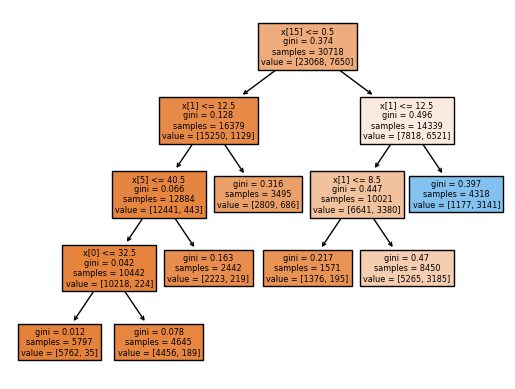

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89     23068
           1       0.73      0.41      0.52      7650

    accuracy                           0.81     30718
   macro avg       0.78      0.68      0.70     30718
weighted avg       0.80      0.81      0.80     30718




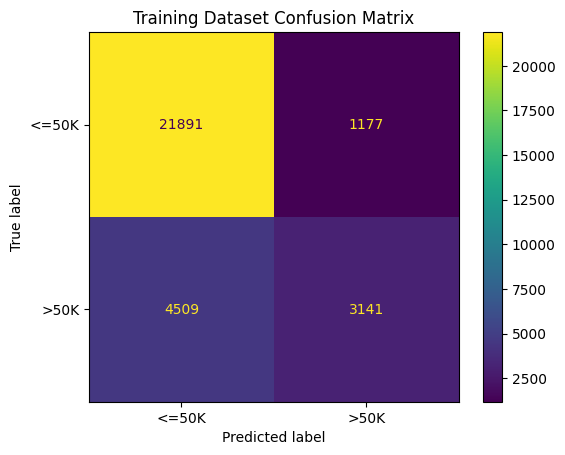

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5693
           1       0.74      0.41      0.53      1837

    accuracy                           0.82      7530
   macro avg       0.79      0.68      0.71      7530
weighted avg       0.81      0.82      0.80      7530




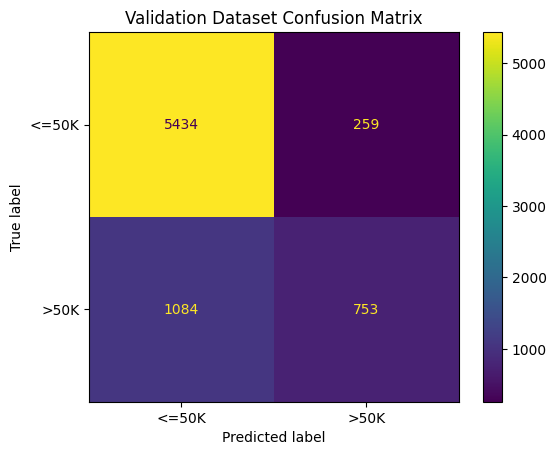

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Split = 0.4
### train macro acc = 70%; val macro acc = 71%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.05, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


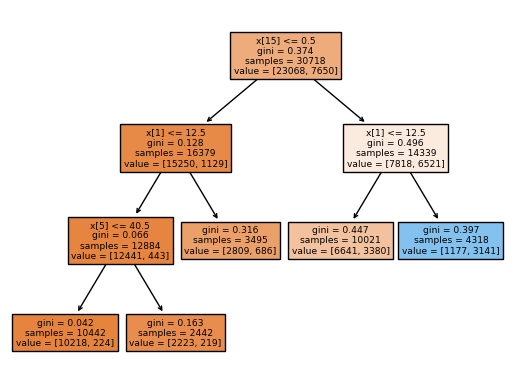

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89     23068
           1       0.73      0.41      0.52      7650

    accuracy                           0.81     30718
   macro avg       0.78      0.68      0.70     30718
weighted avg       0.80      0.81      0.80     30718




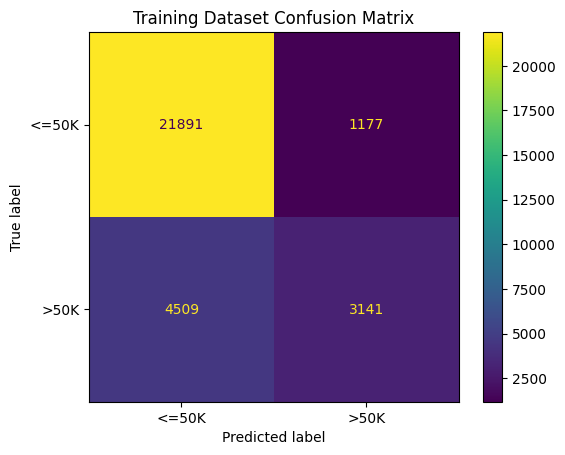

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5693
           1       0.74      0.41      0.53      1837

    accuracy                           0.82      7530
   macro avg       0.79      0.68      0.71      7530
weighted avg       0.81      0.82      0.80      7530




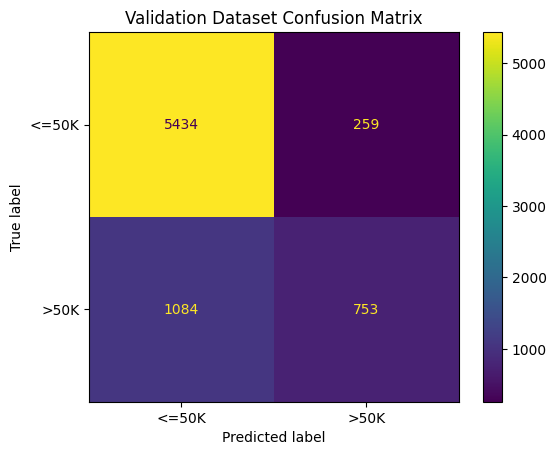

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Split = 0.5
### train macro acc = 43%; val macro acc = 43%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.5, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.05, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


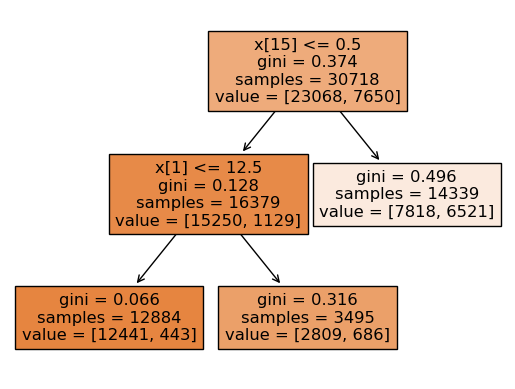

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     23068
           1       0.00      0.00      0.00      7650

    accuracy                           0.75     30718
   macro avg       0.38      0.50      0.43     30718
weighted avg       0.56      0.75      0.64     30718




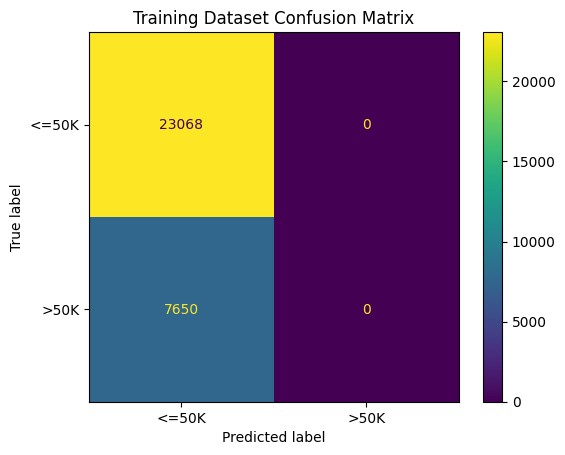

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Classification Report:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5693
           1       0.00      0.00      0.00      1837

    accuracy                           0.76      7530
   macro avg       0.38      0.50      0.43      7530
weighted avg       0.57      0.76      0.65      7530




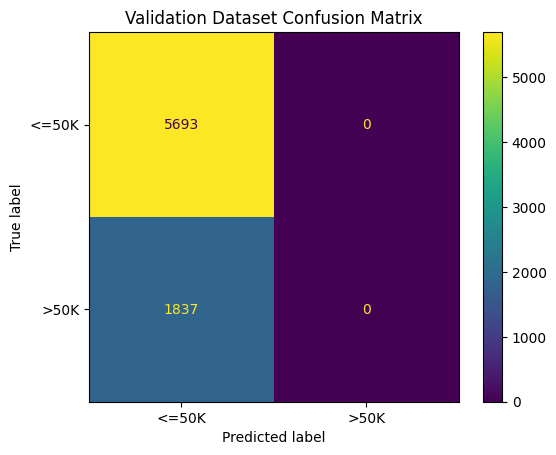

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

# <font color= 'blue'> Experiment 2: Decision Tree - Min_Samples_Leaf (0.05, 0.1, 0.3, 0.2, 0.25)

***Architecture Constants:***
- min_samples_split - 0.4

***Best Model:*** Min_Samples_Leaf = 0.2

Performance improves for 0.2, and then decreases again close to 0.2 (0.25 resulted in 8% accuracy decrease, and 0.3 performance dropped down to 43%)

## Min_Samples_Leaf = 0.05
### train macro acc = 70%; val macro acc = 71%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.05, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


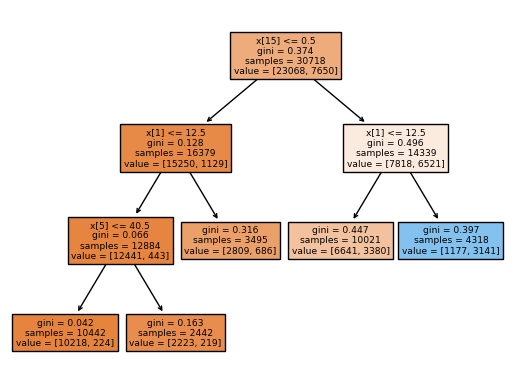

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89     23068
           1       0.73      0.41      0.52      7650

    accuracy                           0.81     30718
   macro avg       0.78      0.68      0.70     30718
weighted avg       0.80      0.81      0.80     30718




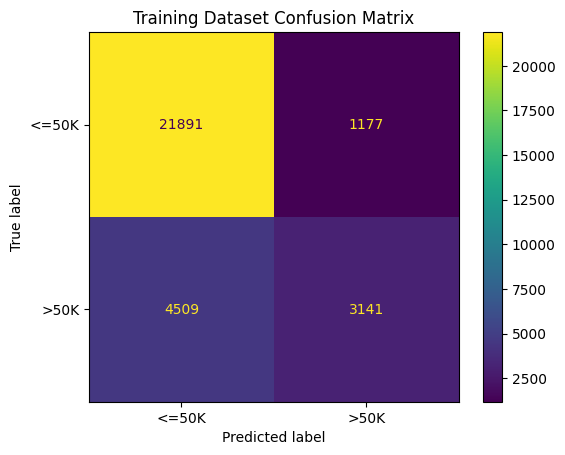

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5693
           1       0.74      0.41      0.53      1837

    accuracy                           0.82      7530
   macro avg       0.79      0.68      0.71      7530
weighted avg       0.81      0.82      0.80      7530




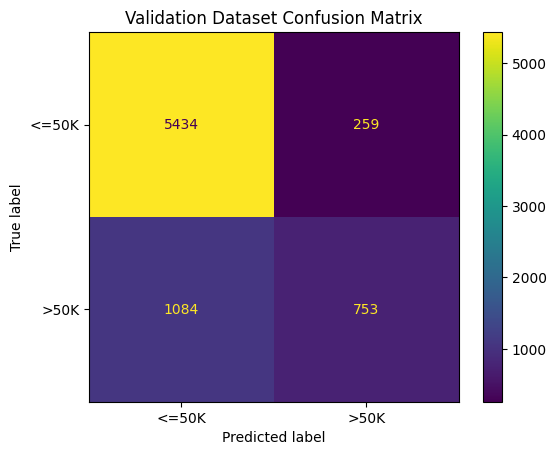

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Leaf = 0.1
### train macro acc = 70%; val macro acc = 71%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.1, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


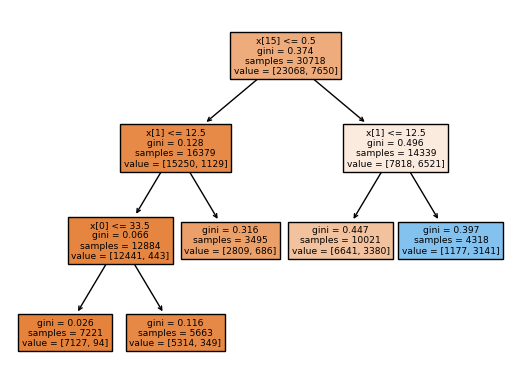

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89     23068
           1       0.73      0.41      0.52      7650

    accuracy                           0.81     30718
   macro avg       0.78      0.68      0.70     30718
weighted avg       0.80      0.81      0.80     30718




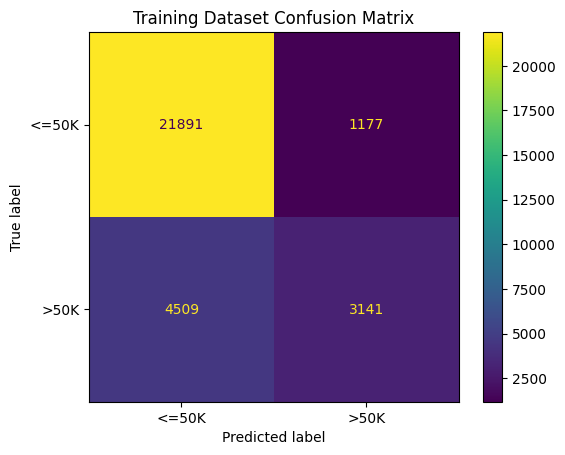

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5693
           1       0.74      0.41      0.53      1837

    accuracy                           0.82      7530
   macro avg       0.79      0.68      0.71      7530
weighted avg       0.81      0.82      0.80      7530




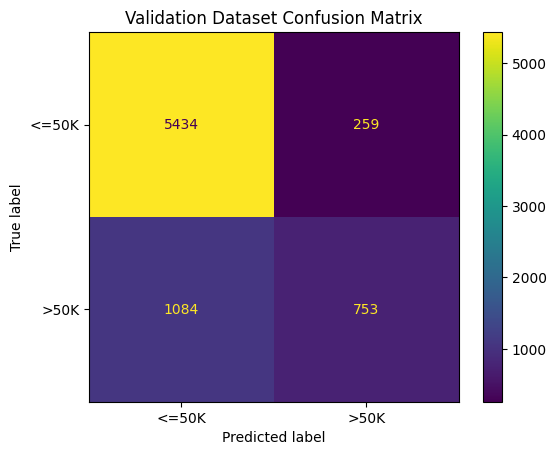

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Leaf = 0.3
### train macro acc = 43%; val macro acc = 43%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.3, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


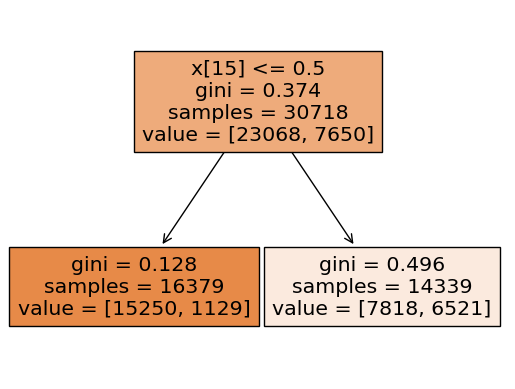

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     23068
           1       0.00      0.00      0.00      7650

    accuracy                           0.75     30718
   macro avg       0.38      0.50      0.43     30718
weighted avg       0.56      0.75      0.64     30718




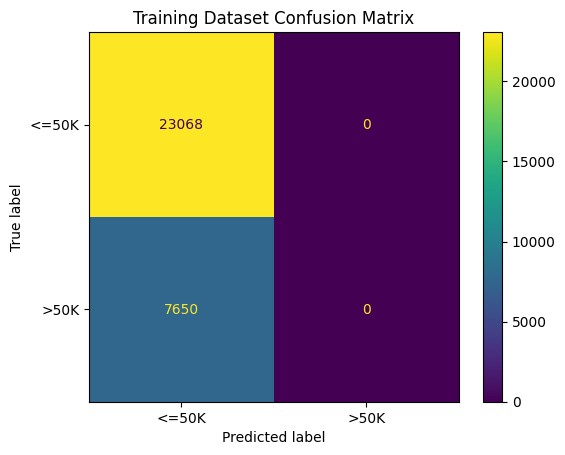

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Classification Report:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5693
           1       0.00      0.00      0.00      1837

    accuracy                           0.76      7530
   macro avg       0.38      0.50      0.43      7530
weighted avg       0.57      0.76      0.65      7530




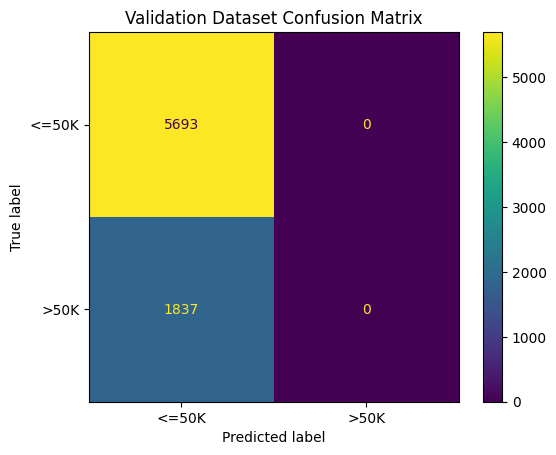

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Leaf = 0.2
### train macro acc = 74%; val macro acc = 75%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


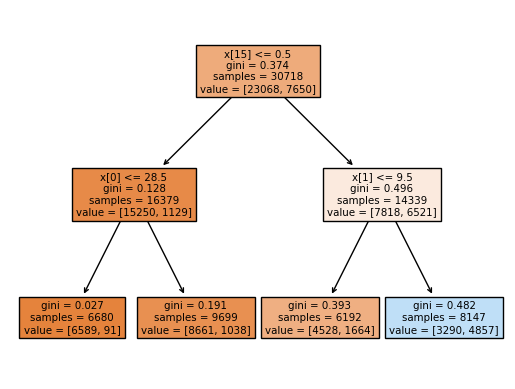

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.86      0.87     23068
           1       0.60      0.63      0.61      7650

    accuracy                           0.80     30718
   macro avg       0.74      0.75      0.74     30718
weighted avg       0.81      0.80      0.80     30718




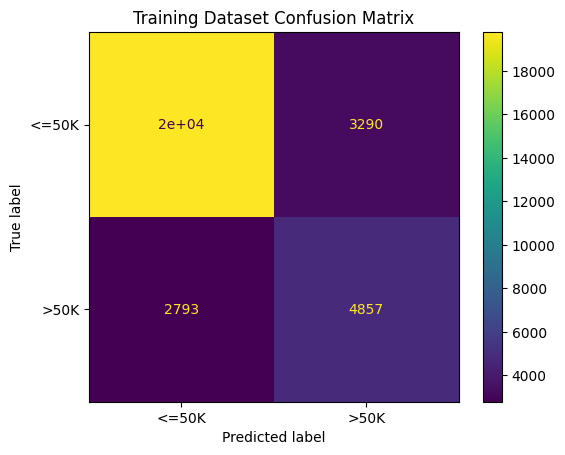

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      5693
           1       0.61      0.64      0.63      1837

    accuracy                           0.81      7530
   macro avg       0.75      0.76      0.75      7530
weighted avg       0.82      0.81      0.81      7530




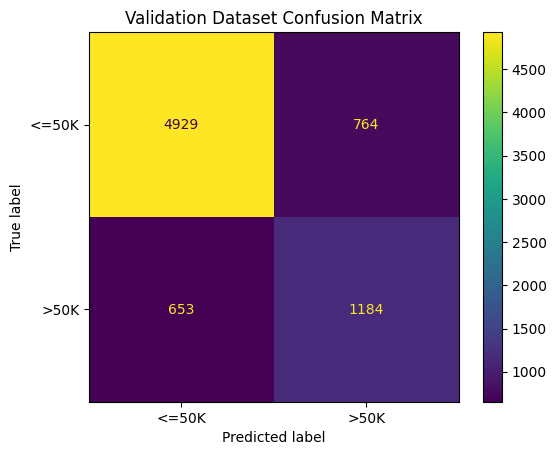

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Min_Samples_Leaf = 0.25
### train macro acc = 67%; val macro acc = 67%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.23, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


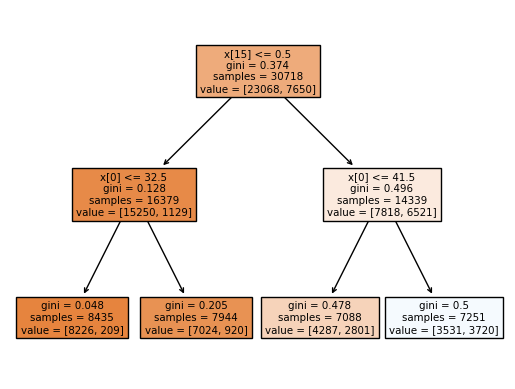

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.85      0.84     23068
           1       0.51      0.49      0.50      7650

    accuracy                           0.76     30718
   macro avg       0.67      0.67      0.67     30718
weighted avg       0.75      0.76      0.75     30718




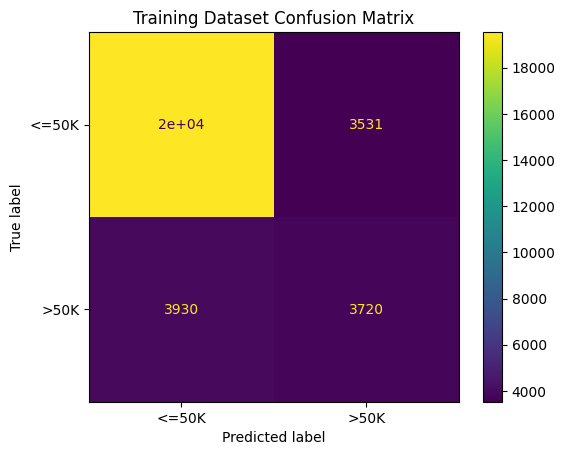

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84      5693
           1       0.50      0.49      0.50      1837

    accuracy                           0.76      7530
   macro avg       0.67      0.67      0.67      7530
weighted avg       0.76      0.76      0.76      7530




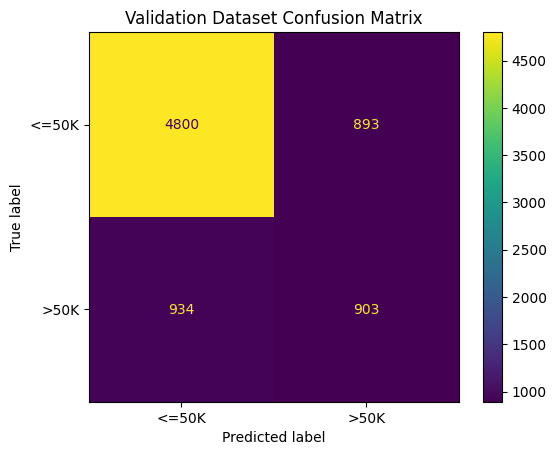

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

# <font color= 'blue'> Experiment 3: Decision Tree - Criterion (gini, entropy)

***Architecture Constants:***
- min_samples_split = 0.4
- min_samples_leaf = 0.2

***Best Model:*** Inconclusive - using gini for now

Criterion may have caused a difference in trees earlier in project, when tree was larger with less restrictions

## Criterion = Gini
### train macro acc = 74%; val macro acc = 75%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


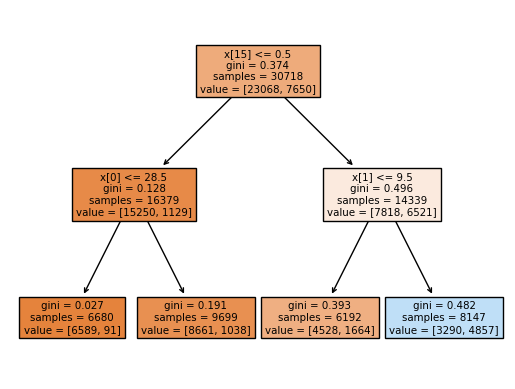

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.86      0.87     23068
           1       0.60      0.63      0.61      7650

    accuracy                           0.80     30718
   macro avg       0.74      0.75      0.74     30718
weighted avg       0.81      0.80      0.80     30718




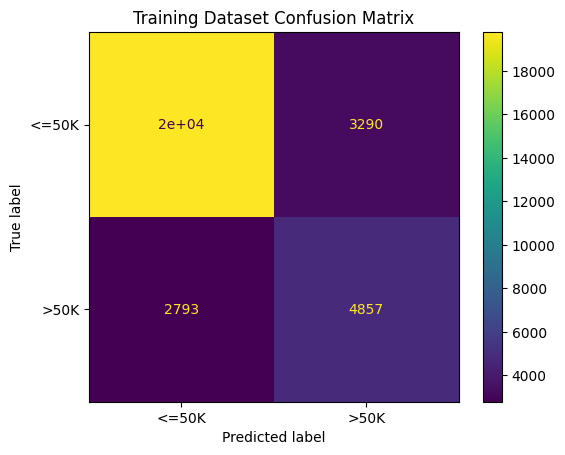

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      5693
           1       0.61      0.64      0.63      1837

    accuracy                           0.81      7530
   macro avg       0.75      0.76      0.75      7530
weighted avg       0.82      0.81      0.81      7530




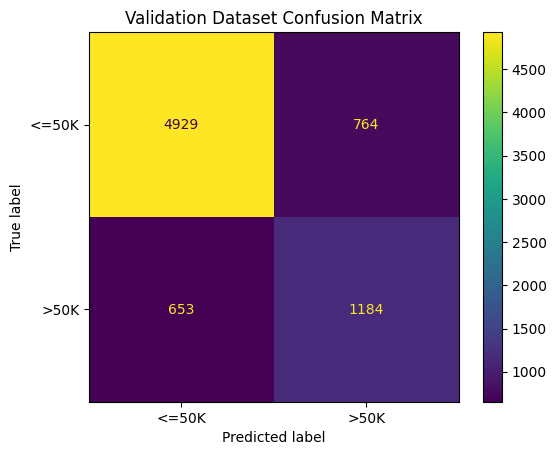

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Criterion = Entropy
### train macro acc = 74%; val macro acc = 75%

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='entropy',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


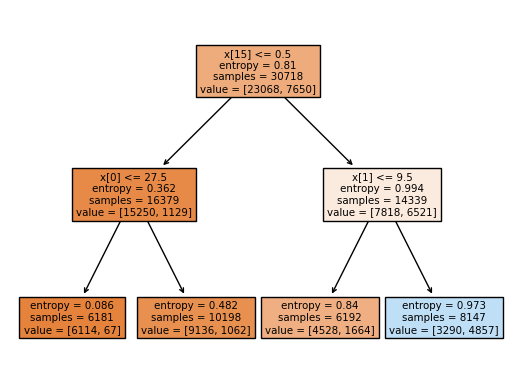

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.86      0.87     23068
           1       0.60      0.63      0.61      7650

    accuracy                           0.80     30718
   macro avg       0.74      0.75      0.74     30718
weighted avg       0.81      0.80      0.80     30718




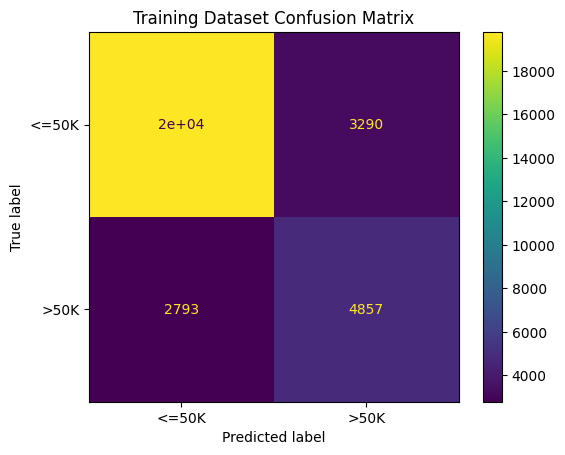

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      5693
           1       0.61      0.64      0.63      1837

    accuracy                           0.81      7530
   macro avg       0.75      0.76      0.75      7530
weighted avg       0.82      0.81      0.81      7530




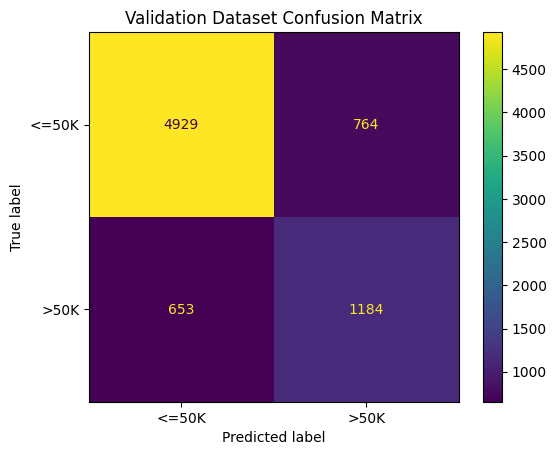

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

# <font color= 'blue'> [Data] Experiment 4: Weighted Decision Tree

***Architecture Constants:***
- min_samples_split = 0.4
- min_samples_leaf = 0.2
- criterion = gini

***Best Model:*** Unweighted

Best model chosen based on f1 score & accuracy performance

Current model architecture parameters were chosen based off of unweighted model performances. The model progression may have caused weighted models to perform worse than if model architecture parameters were chosen based off of weight model performed from the beginning of the project. Maybe weighted model should have been implemented earlier?

Performance between model with small weight formula and larger weights formula was the same. Maybe could still try weighted trees for random forest?

In [ ]:
print(f'Avg class probability in train:   {trainY.mean():.4f}')
print(f'Avg class probability in valid:   {validY.mean():.4f}')
print(f'Avg class probability in test:    {testY.mean():.4f}')

Avg class probability in train:   0.2490
Avg class probability in valid:   0.2440
Avg class probability in test:    0.2474


There are more samples of class 0 (<= 50k) than class 1 (>50k)

## Unweighted
- no weights
### train macro acc = 74%; val macro acc = 75%
### <=50k f1-score = 0.87; >50k f1-score = 0.63

In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


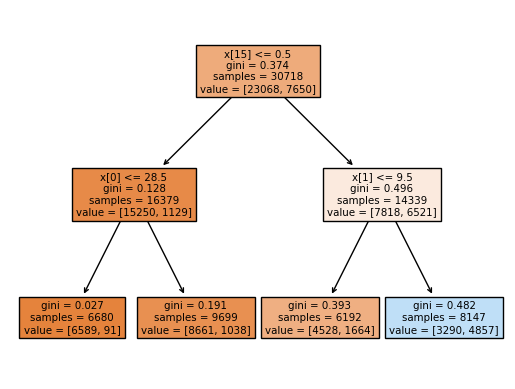

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.86      0.87     23068
           1       0.60      0.63      0.61      7650

    accuracy                           0.80     30718
   macro avg       0.74      0.75      0.74     30718
weighted avg       0.81      0.80      0.80     30718




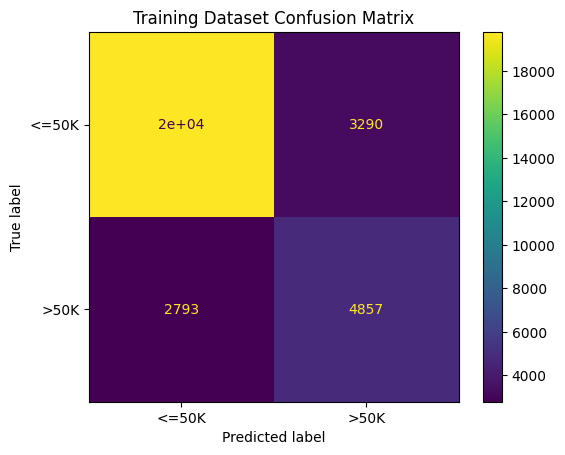

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      5693
           1       0.61      0.64      0.63      1837

    accuracy                           0.81      7530
   macro avg       0.75      0.76      0.75      7530
weighted avg       0.82      0.81      0.81      7530




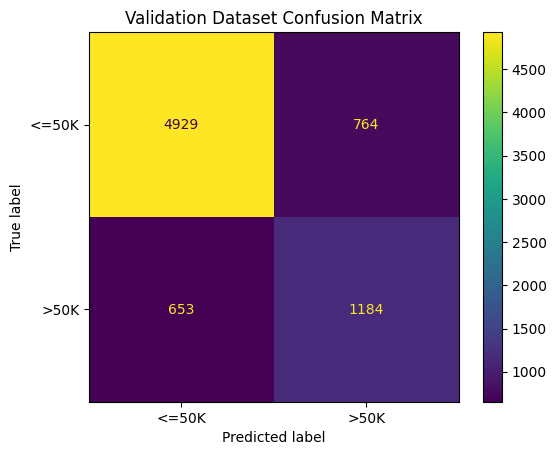

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Weighted (small weights)
- weight dictionary: {0: 4.3350095370209814e-05, 1: 0.00013071895424836603}
### train macro acc = 68%; val macro acc = 69%
### <=50k f1-score = 0.77; >50k f1-score = 0.59

**formula for class weights**

`class weight = 1 / (class samples)`

In [ ]:
unique, counts = np.unique(trainY, return_counts=True)
counts_dict = dict(zip(unique, counts))
# Printing dictionary
print(" Counts Dictionary: " + str(counts_dict))

weight_for_0 = 1.0 / counts_dict[0]
weight_for_1 = 1.0 / counts_dict[1]
weights_dict = {0: weight_for_0, 1: weight_for_1}
# Printing dictionary
print(" Weights Dictionary: " + str(weights_dict))

 Counts Dictionary: {0: 23068, 1: 7650}
 Weights Dictionary: {0: 4.3350095370209814e-05, 1: 0.00013071895424836603}


In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = weights_dict,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


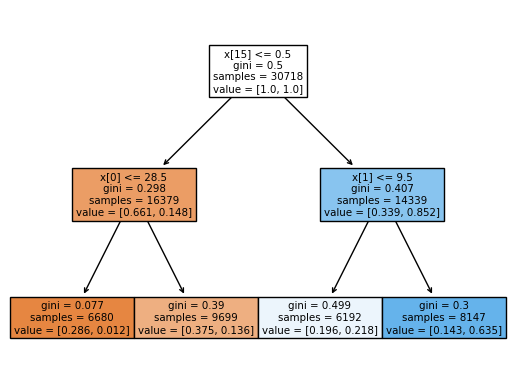

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.66      0.77     23068
           1       0.45      0.85      0.59      7650

    accuracy                           0.71     30718
   macro avg       0.69      0.76      0.68     30718
weighted avg       0.81      0.71      0.73     30718




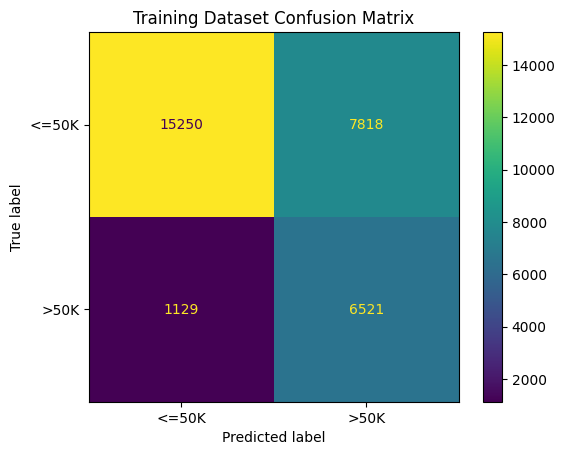

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.67      0.78      5693
           1       0.45      0.86      0.60      1837

    accuracy                           0.71      7530
   macro avg       0.70      0.76      0.69      7530
weighted avg       0.82      0.71      0.73      7530




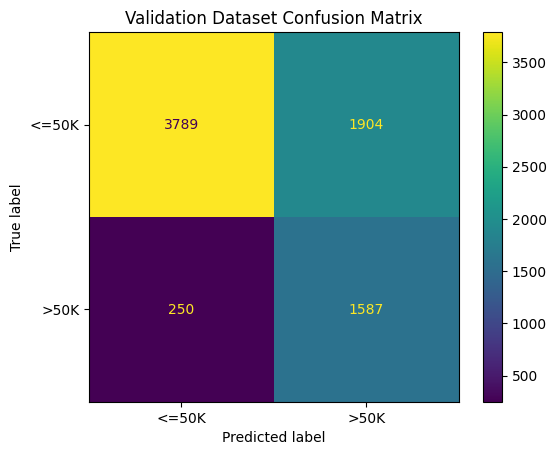

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

## Weighted (large weights)
- using different formula for weights
- weight dictionary: {0: 0.6658141147910526, 1: 2.0077124183006534}
### train macro acc = 68%; val macro acc = 69%
### <=50k f1-score = 0.77; >50k f1-score = 0.59

**new formula for class weights**

`class weight = total samples / (number of classes * class samples)`

In [ ]:
total_sample = counts_dict[0] + counts_dict[1]
print(f'Total samples: {total_sample}')
unique, counts = np.unique(trainY, return_counts=True)
counts_dict = dict(zip(unique, counts))
# Printing dictionary
print(" Counts Dictionary: " + str(counts_dict))



weight_for_0 = total_sample / (2 * counts_dict[0])
weight_for_1 = total_sample / (2 * counts_dict[1])
weights_dict = {0: weight_for_0, 1: weight_for_1}
# Printing dictionary
print(" Weights Dictionary: " + str(weights_dict))

Total samples: 30718
 Counts Dictionary: {0: 23068, 1: 7650}
 Weights Dictionary: {0: 0.6658141147910526, 1: 2.0077124183006534}


In [ ]:

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = None, # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = weights_dict,
    ccp_alpha = 0.0,
    random_state=42
  )

Fitting model...


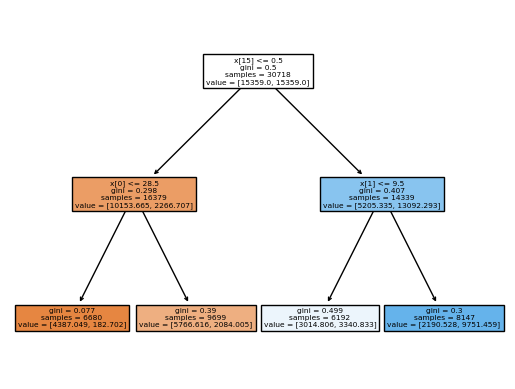

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
decision_tree_model.get_params()

# fit model (train)
print("Fitting model...")
decision_tree_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
plot_tree(decision_tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.66      0.77     23068
           1       0.45      0.85      0.59      7650

    accuracy                           0.71     30718
   macro avg       0.69      0.76      0.68     30718
weighted avg       0.81      0.71      0.73     30718




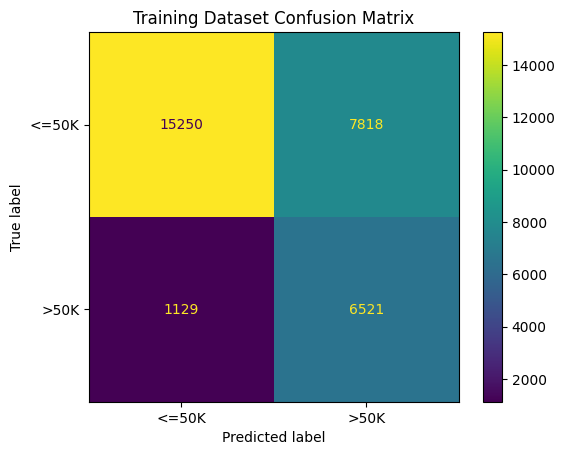

In [ ]:
get_metrics(decision_tree_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.67      0.78      5693
           1       0.45      0.86      0.60      1837

    accuracy                           0.71      7530
   macro avg       0.70      0.76      0.69      7530
weighted avg       0.82      0.71      0.73      7530




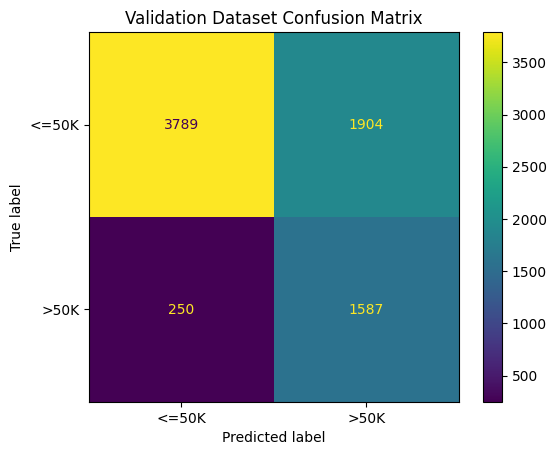

In [ ]:
get_metrics(decision_tree_model, validX, validY, "Validation")

# <font color= 'blue'> Experiment 5: Random Forest Model - Num_Trees (100, 200, 500)

***Architecture Constants:***
- min_samples_split = 0.4
- min_samples_leaf = 0.2
- criterion = gini
- unweighted
- max features = sqrt

***Best Model:*** None

Random forest did not improve model

## Num_Trees = 100
### train macro acc = 43%; val macro acc = 43%

In [ ]:

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators = 100,
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
random_forest_model.get_params()

# fit model (train)
print("Fitting model...")
random_forest_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


RandomForestClassifier(min_samples_leaf=0.2, min_samples_split=0.4,
                       random_state=42, verbose=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     23068
           1       0.00      0.00      0.00      7650

    accuracy                           0.75     30718
   macro avg       0.38      0.50      0.43     30718
weighted avg       0.56      0.75      0.64     30718




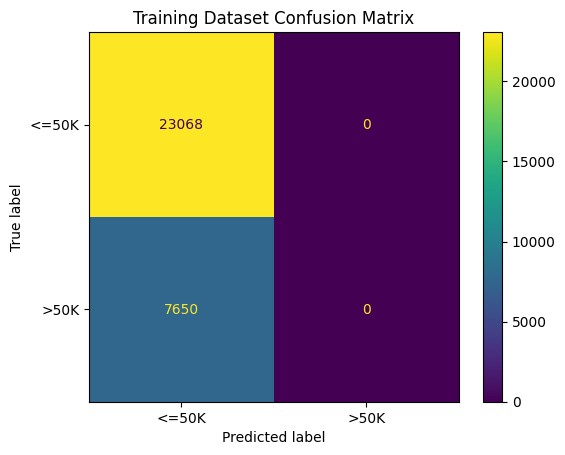

In [ ]:
get_metrics(random_forest_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Classification Report:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5693
           1       0.00      0.00      0.00      1837

    accuracy                           0.76      7530
   macro avg       0.38      0.50      0.43      7530
weighted avg       0.57      0.76      0.65      7530




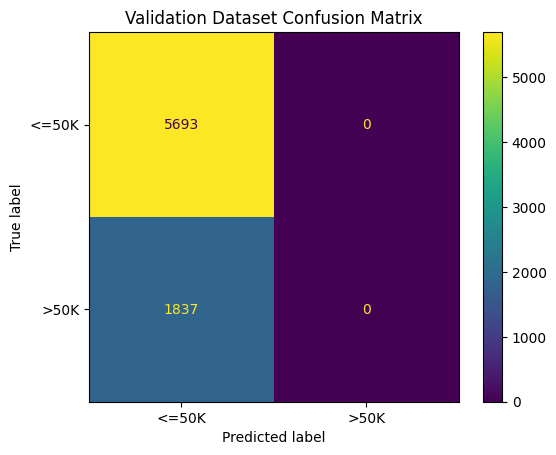

In [ ]:
get_metrics(random_forest_model, validX, validY, "Validation")

## Num_Trees = 200
### train macro acc = 43%; val macro acc = 43%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators = 200,
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
random_forest_model.get_params()

# fit model (train)
print("Fitting model...")
random_forest_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.7s


RandomForestClassifier(min_samples_leaf=0.2, min_samples_split=0.4,
                       n_estimators=200, random_state=42, verbose=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

Training Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     23068
           1       0.00      0.00      0.00      7650

    accuracy                           0.75     30718
   macro avg       0.38      0.50      0.43     30718
weighted avg       0.56      0.75      0.64     30718




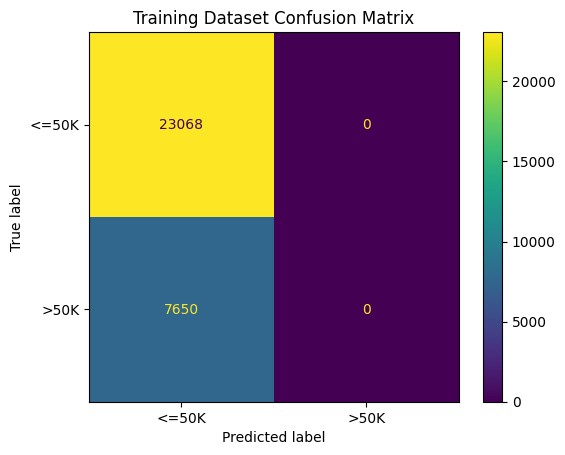

In [ ]:
get_metrics(random_forest_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5693
           1       0.00      0.00      0.00      1837

    accuracy                           0.76      7530
   macro avg       0.38      0.50      0.43      7530
weighted avg       0.57      0.76      0.65      7530




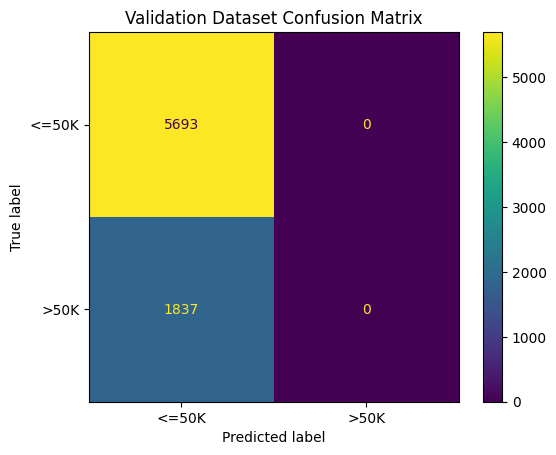

In [ ]:
get_metrics(random_forest_model, validX, validY, "Validation")

## Num_Trees = 500
### train macro acc = 43%; val macro acc = 43%

In [ ]:

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators = 500,
    criterion='gini',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
# Train the decision tree model

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree

# model --> decision_tree_model
random_forest_model.get_params()

# fit model (train)
print("Fitting model...")
random_forest_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.7s


RandomForestClassifier(min_samples_leaf=0.2, min_samples_split=0.4,
                       n_estimators=500, random_state=42, verbose=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Training Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     23068
           1       0.00      0.00      0.00      7650

    accuracy                           0.75     30718
   macro avg       0.38      0.50      0.43     30718
weighted avg       0.56      0.75      0.64     30718




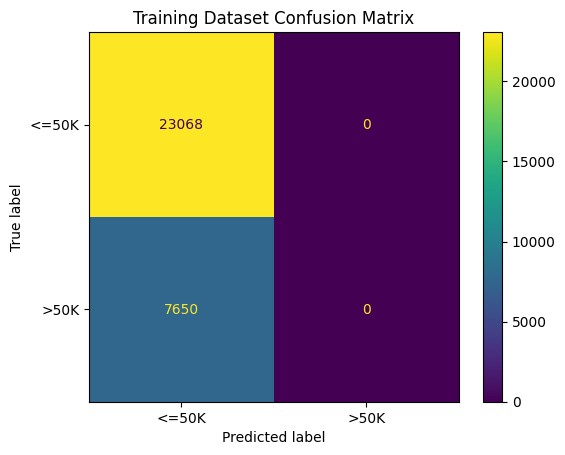

In [ ]:
get_metrics(random_forest_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5693
           1       0.00      0.00      0.00      1837

    accuracy                           0.76      7530
   macro avg       0.38      0.50      0.43      7530
weighted avg       0.57      0.76      0.65      7530




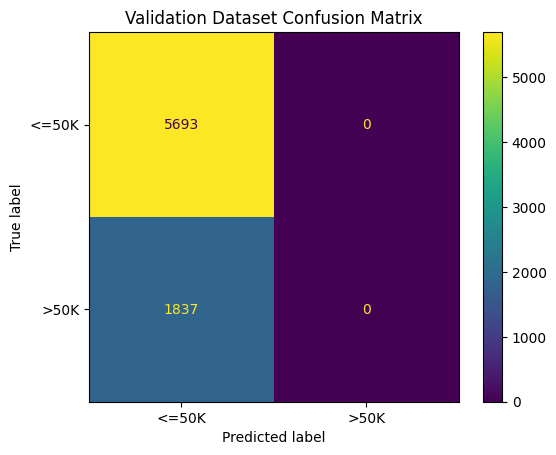

In [ ]:
get_metrics(random_forest_model, validX, validY, "Validation")

# <font color= 'blue'> Experiment 6: Gradient Boosted Model - Num_Trees (100, 200, 500)

***Architecture Constants:***
- min_samples_split = 0.4
- min_samples_leaf = 0.2
- criterion = log loss
- unweighted
- max_depth = none

***Best Model:*** 700 trees

^^F1-Score for class 0 improved, F1-Score for class 1 remained the same from decision tree classifer.

Slight improvement from 100 trees to 700 trees. No improvement after 700 trees (tested until 10,000 trees)

## Num_Trees = 100
### train macro acc = 73%; val macro acc = 73%

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 100,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)

grad_boost_model.get_params()

# fit model (train)
print("Fitting model...")
grad_boost_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025            1.16s
         2           1.0730            1.26s
         3           1.0588            1.19s
         4           1.0569            1.13s
         5           1.0386            1.13s
         6           1.0272            1.11s
         7           1.0189            1.08s
         8           1.0129            1.21s
         9           1.0129            1.21s
        10           0.9996            1.31s
        20           0.9496            1.34s
        30           0.8735            1.20s
        40           0.8322            1.03s
        50           0.8041            0.80s
        60           0.7928            0.60s
        70           0.7815            0.43s
        80           0.7743            0.28s
        90           0.7703            0.13s
       100           0.7661            0.00s


GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           random_state=42, verbose=1)

Training Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.93      0.89     23068
           1       0.70      0.47      0.57      7650

    accuracy                           0.82     30718
   macro avg       0.77      0.70      0.73     30718
weighted avg       0.81      0.82      0.81     30718




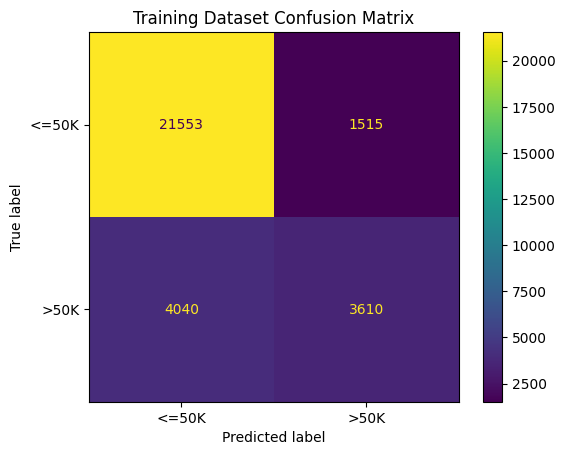

In [ ]:
get_metrics(grad_boost_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.94      0.89      5693
           1       0.71      0.47      0.57      1837

    accuracy                           0.82      7530
   macro avg       0.78      0.71      0.73      7530
weighted avg       0.81      0.82      0.81      7530




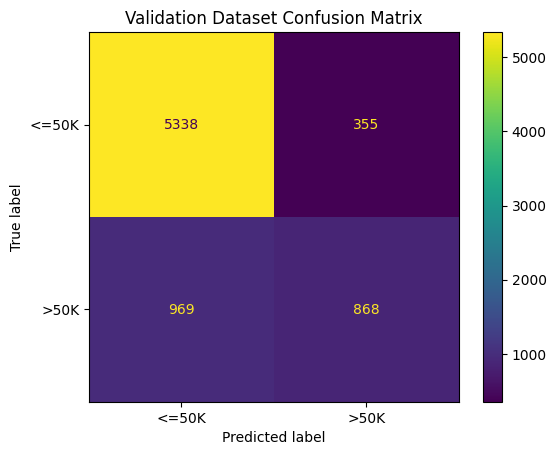

In [ ]:
get_metrics(grad_boost_model, validX, validY, "Validation")

## Num_Trees = 200
### train macro acc = 73%; val macro acc = 74%

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 200,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)

grad_boost_model.get_params()

# fit model (train)
print("Fitting model...")
grad_boost_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025            2.28s
         2           1.0730            2.55s
         3           1.0588            2.49s
         4           1.0569            2.37s
         5           1.0386            2.38s
         6           1.0272            2.35s
         7           1.0189            2.29s
         8           1.0129            2.23s
         9           1.0129            2.14s
        10           0.9996            2.15s
        20           0.9496            1.90s
        30           0.8735            1.89s
        40           0.8322            1.83s
        50           0.8041            1.76s
        60           0.7928            1.65s
        70           0.7815            1.54s
        80           0.7743            1.42s
        90           0.7703            1.28s
       100           0.7661            1.14s
       200           0.7498            0.00s


GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           n_estimators=200, random_state=42, verbose=1)

Training Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.93      0.89     23068
           1       0.70      0.50      0.58      7650

    accuracy                           0.82     30718
   macro avg       0.77      0.71      0.73     30718
weighted avg       0.81      0.82      0.81     30718




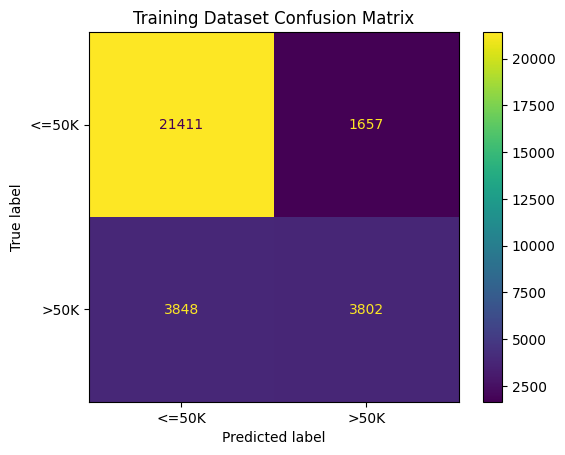

In [ ]:
get_metrics(grad_boost_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.93      0.89      5693
           1       0.70      0.51      0.59      1837

    accuracy                           0.83      7530
   macro avg       0.78      0.72      0.74      7530
weighted avg       0.82      0.83      0.82      7530




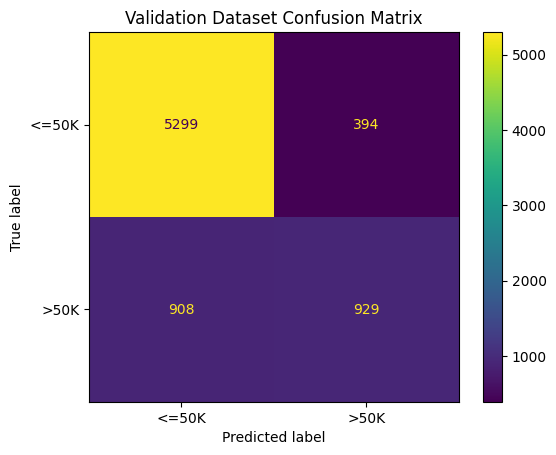

In [ ]:
get_metrics(grad_boost_model, validX, validY, "Validation")

## Num_Trees = 500
### train macro acc = 74%; val macro acc = 75%

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 500,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)

grad_boost_model.get_params()

# fit model (train)
print("Fitting model...")
grad_boost_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025            5.79s
         2           1.0730            6.53s
         3           1.0588            6.91s
         4           1.0569            6.45s
         5           1.0386            6.39s
         6           1.0272            6.68s
         7           1.0189            6.47s
         8           1.0129            6.29s
         9           1.0129            6.01s
        10           0.9996            6.03s
        20           0.9496            5.42s
        30           0.8735            5.49s
        40           0.8322            5.41s
        50           0.8041            5.42s
        60           0.7928            5.19s
        70           0.7815            5.09s
        80           0.7743            4.89s
        90           0.7703            4.74s
       100           0.7661            4.52s
       200           0.7498            3.35s
       300           0.7464          

GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           n_estimators=500, random_state=42, verbose=1)

Training Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.92      0.89     23068
           1       0.69      0.52      0.59      7650

    accuracy                           0.82     30718
   macro avg       0.77      0.72      0.74     30718
weighted avg       0.81      0.82      0.81     30718




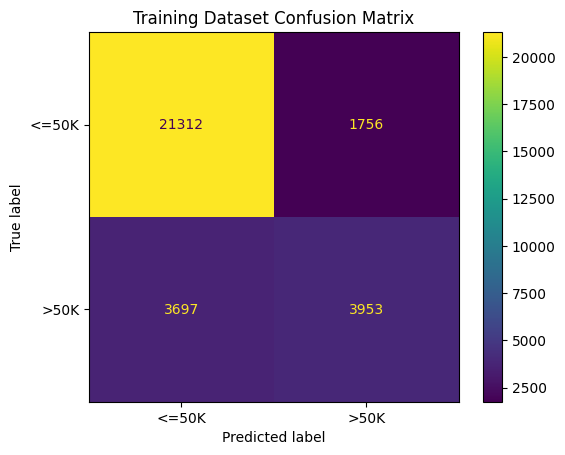

In [ ]:
get_metrics(grad_boost_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.93      0.89      5693
           1       0.70      0.52      0.60      1837

    accuracy                           0.83      7530
   macro avg       0.78      0.73      0.75      7530
weighted avg       0.82      0.83      0.82      7530




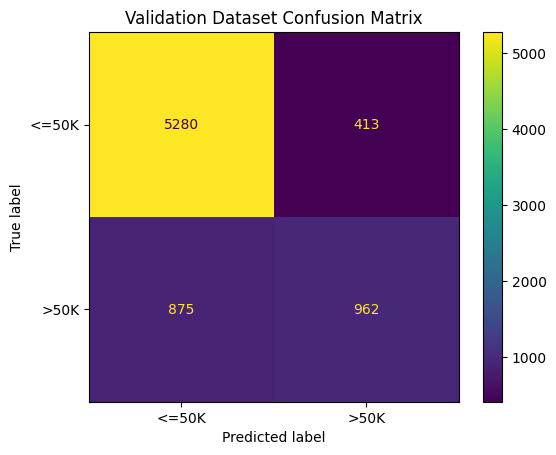

In [ ]:
get_metrics(grad_boost_model, validX, validY, "Validation")

## Num_Trees = 700
### train macro acc = 75%; val macro acc = 75%

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 700,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)

grad_boost_model.get_params()

# fit model (train)
print("Fitting model...")
grad_boost_model.fit(trainX, trainY) # model.fit(x, y)

# plot the decision tree
#plot_tree(random_forest_model, filled=True)
#plt.show()

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025           13.41s
         2           1.0730           13.19s
         3           1.0588           13.40s
         4           1.0569           11.77s
         5           1.0386           13.37s
         6           1.0272           13.80s
         7           1.0189           13.53s
         8           1.0129           12.70s
         9           1.0129           11.84s
        10           0.9996           11.80s
        20           0.9496           11.34s
        30           0.8735           12.89s
        40           0.8322           13.30s
        50           0.8041           13.75s
        60           0.7928           12.68s
        70           0.7815           12.34s
        80           0.7743           11.72s
        90           0.7703           11.32s
       100           0.7661           11.11s
       200           0.7498            7.66s
       300           0.7464          

GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           n_estimators=700, random_state=42, verbose=1)

Training Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89     23068
           1       0.69      0.54      0.61      7650

    accuracy                           0.82     30718
   macro avg       0.77      0.73      0.75     30718
weighted avg       0.82      0.82      0.82     30718




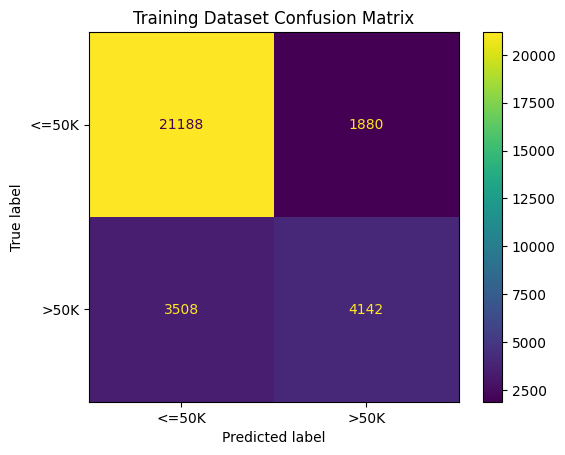

In [ ]:
get_metrics(grad_boost_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89      5693
           1       0.69      0.54      0.61      1837

    accuracy                           0.83      7530
   macro avg       0.78      0.73      0.75      7530
weighted avg       0.82      0.83      0.82      7530




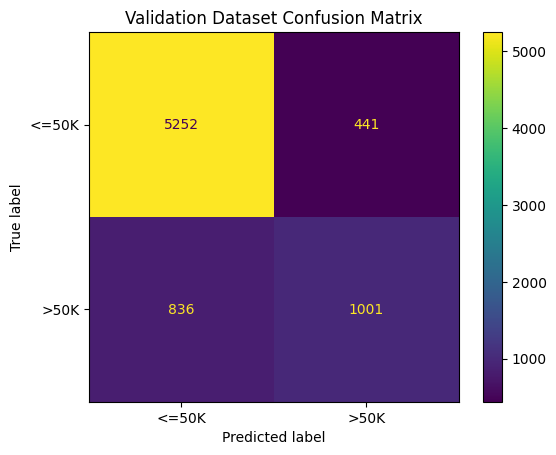

In [ ]:
get_metrics(grad_boost_model, validX, validY, "Validation")

## Num_Trees = 1,000
### train macro acc = 75%; val macro acc = 75%

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 1000,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
grad_boost_model.get_params()
print("Fitting model...")
grad_boost_model.fit(trainX, trainY) # model.fit(x, y)

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025           11.56s
         2           1.0730           13.81s
         3           1.0588           13.45s
         4           1.0569           12.51s
         5           1.0386           17.38s
         6           1.0272           17.60s
         7           1.0189           18.61s
         8           1.0129           19.64s
         9           1.0129           19.09s
        10           0.9996           19.03s
        20           0.9496           16.69s
        30           0.8735           15.16s
        40           0.8322           14.18s
        50           0.8041           13.58s
        60           0.7928           12.81s
        70           0.7815           12.38s
        80           0.7743           12.04s
        90           0.7703           12.26s
       100           0.7661           12.44s
       200           0.7498            9.28s
       300           0.7464          

GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           n_estimators=1000, random_state=42, verbose=1)

Training Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89     23068
           1       0.69      0.55      0.61      7650

    accuracy                           0.82     30718
   macro avg       0.77      0.73      0.75     30718
weighted avg       0.82      0.82      0.82     30718




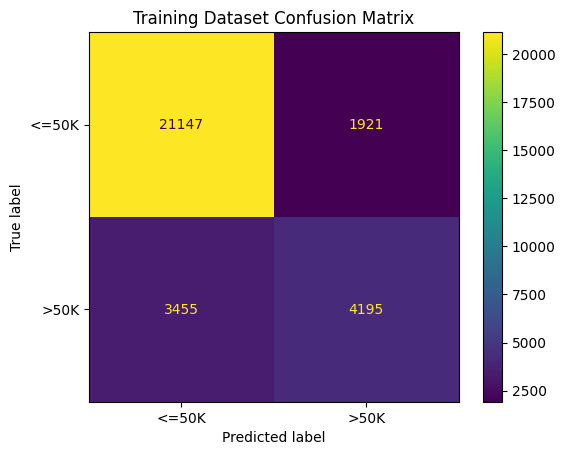

In [ ]:
get_metrics(grad_boost_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89      5693
           1       0.69      0.55      0.61      1837

    accuracy                           0.83      7530
   macro avg       0.78      0.74      0.75      7530
weighted avg       0.82      0.83      0.82      7530




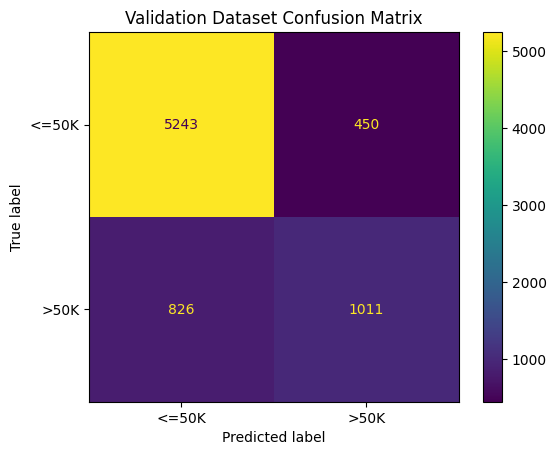

In [ ]:
get_metrics(grad_boost_model, validX, validY, "Validation")

## Num_Trees = 10,000
### train macro acc = 75%; val macro acc = 75%

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 10000,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
grad_boost_model.get_params()
print("Fitting model...")
grad_boost_model.fit(trainX, trainY) # model.fit(x, y)

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025            1.62m
         2           1.0730            1.59m
         3           1.0588            1.47m
         4           1.0569            1.38m
         5           1.0386            1.38m
         6           1.0272            1.37m
         7           1.0189            1.34m
         8           1.0129            1.31m
         9           1.0129            1.26m
        10           0.9996            1.31m
        20           0.9496            1.21m
        30           0.8735            1.45m
        40           0.8322            1.58m
        50           0.8041            1.65m
        60           0.7928            1.66m
        70           0.7815            1.66m
        80           0.7743            1.67m
        90           0.7703            1.66m
       100           0.7661            1.65m
       200           0.7498            1.67m
       300           0.7464          

GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           n_estimators=10000, random_state=42, verbose=1)

Training Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.91      0.89     23068
           1       0.68      0.56      0.61      7650

    accuracy                           0.83     30718
   macro avg       0.77      0.74      0.75     30718
weighted avg       0.82      0.83      0.82     30718




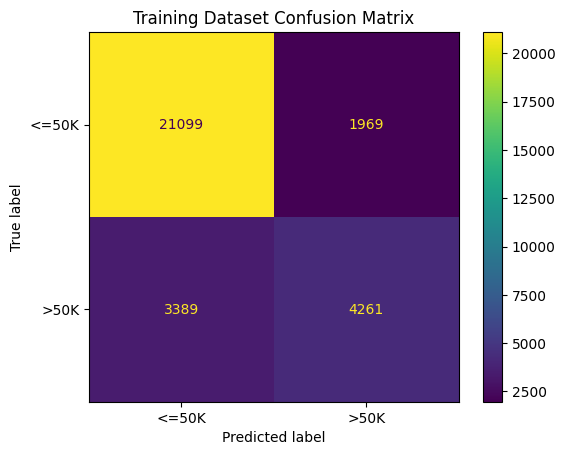

In [ ]:
get_metrics(grad_boost_model, trainX, trainY, "Training")
# ^^ not sure whats going on.. sometimes adding plt.grid(None) solves the problem. Sometimes removing plt.grid(None) also solves the problem?

Validation Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89      5693
           1       0.69      0.55      0.62      1837

    accuracy                           0.83      7530
   macro avg       0.78      0.74      0.75      7530
weighted avg       0.82      0.83      0.82      7530




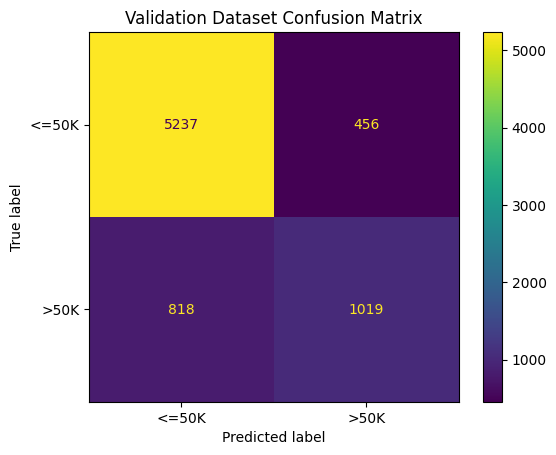

In [ ]:
get_metrics(grad_boost_model, validX, validY, "Validation")

# <font color= 'blue'> Classifying Testing Data Split
- Gradient Boosted Model & Logistic Regression Model

***Results:***
Logisitic Regression model had less overfitting (1% vs. 2%), higher macro accuracy (76% vs. 73%) & f1-scores than best model from experimentation, the Gradient Boosted model


## Gradient Boosted Model
### Train/Val: 75% macro accuracy
### Test: 73% macro accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(
    n_estimators = 700,
    loss='log_loss',
    criterion='friedman_mse',
    #max_depth= , # don't have to set max_depth. default is nodes expanded until all leaves are pure / contain less than minimum
    min_samples_split = 0.4, # minimum number of samples required to split leaf node (can be proportion)
    min_samples_leaf = 0.2, # minimum number of samples required in a leaf node (can be proportion)
    max_features = 'sqrt', # number of features to consider when looking for best split
    min_impurity_decrease = 0.0, # node will split if impurity decreases by this much
    subsample = 1.0, # less than 1 = stochastic gradient boosting
    max_depth = None,
    #class_weight = None,
    verbose = 1,
    random_state=42
  )

In [ ]:
grad_boost_model.get_params()
print("Fitting model...")
grad_boost_model.fit(trainX, trainY)

Fitting model...
      Iter       Train Loss   Remaining Time 
         1           1.1025            6.40s
         2           1.0730            6.78s
         3           1.0588            7.70s
         4           1.0569            8.24s
         5           1.0386            7.91s
         6           1.0272            7.60s
         7           1.0189            7.31s
         8           1.0129            7.07s
         9           1.0129            6.73s
        10           0.9996            6.72s
        20           0.9496            5.61s
        30           0.8735            5.82s
        40           0.8322            5.67s
        50           0.8041            5.48s
        60           0.7928            5.30s
        70           0.7815            5.10s
        80           0.7743            4.90s
        90           0.7703            4.72s
       100           0.7661            4.53s
       200           0.7498            3.69s
       300           0.7464          

GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=0.2, min_samples_split=0.4,
                           n_estimators=700, random_state=42, verbose=1)

Test Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      5667
           1       0.66      0.52      0.58      1863

    accuracy                           0.82      7530
   macro avg       0.76      0.72      0.73      7530
weighted avg       0.81      0.82      0.81      7530




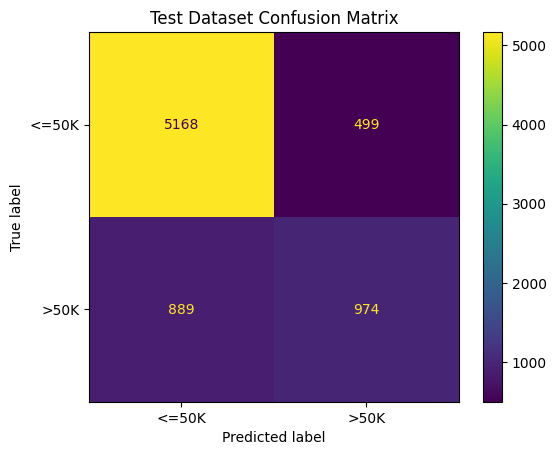

In [ ]:
get_metrics(grad_boost_model, testX, testY, "Test")

## Logistic Regression Model
### Train/Val: 77% macro accuracy
### Test: 76% macro accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

# train
log_model = LogisticRegression()
log_model.get_params()
print("Fitting the model...")
log_model.fit(trainX, trainY)

Fitting the model...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Test Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.92      0.89      5667
           1       0.71      0.57      0.63      1863

    accuracy                           0.83      7530
   macro avg       0.79      0.75      0.76      7530
weighted avg       0.83      0.83      0.83      7530




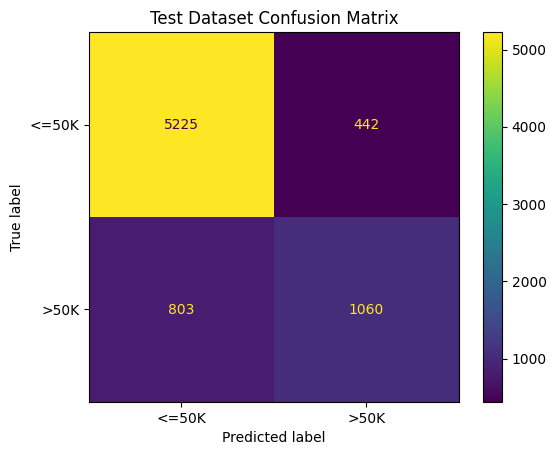

In [ ]:
get_metrics(log_model, testX, testY, "Test")

# <font color= 'blue'> Evaluation of Models

In this scenario, overestimating or underestimating income levels may have equally important outcomes, so both precision and recall was important. However, since the class labels were imbalanced and there were more samples for <=50k income, increasing the F1-score for >50k income was a focus.

Macro accuracy was used since the classes were imbalanced to provide a more informative metric to evaluate the models.

# <font color= 'blue'> Conclusions & Future Improvements
The best macro accuracy, f1 scores for >50k income, and least overfitting was achieved by the logistic regression benchmark model, despite hyperparmater tuning for a decision tree classifer, random forest model, and gradient boosted model. This dataset may be an example of when simpler prediction methods may prove to have advantage over more advanced and complicated machine learning techniques.

Experimentation between models also showed that the random forest model had a very poor performance on the dataset, achieving only a 43% from predicting only 1 class. Some hyperparameter tuning behaviors were also very interesting. For example, class weights for the decision tree classifer caused predictions to become worse instead of better. Tuning results for the minimum samples required to split a leaf node suggested no effect on the decision tree classifer. However, the model seemed to be sensitive to the minimum samples required in a leaf node.

Future improvements for the classification for the dataset chosen in this project should be focused on the logistic regression model. L1 and L2 regularization should be tuned for highest performance possible. Some of the features that were removed for the project can also be re-introduced to observe the effect on results as well.

